In [1]:
import requests
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
#creating an empty review list
iphone_reviews = []


In [3]:
for i in range (1,21):
    ip=[]
    url ="https://www.amazon.in/product-reviews/B08L5T44CQ/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    iphone_reviews = iphone_reviews+ip

In [4]:
##Writing reviews in a text file
with open("iphone.txt","w",encoding = 'utf-8') as output:
    output.write(str(iphone_reviews))

In [5]:
import os
os.getcwd()

'/content'

In [6]:
## Joining all the reviews into single paragraph
red_rev_string = " ".join(iphone_reviews)

In [7]:
##Removing unwanted symbols in case present
red_rev_string = re.sub("[^A-Za-z" "]+"," ",red_rev_string).lower()
red_rev_string =re.sub("[0-9" "]+"," ",red_rev_string)

In [8]:
red_rev_string

' as usual great premium phone of prosthis time the apple iphone uses the right angled bezel of the iphone s which looks square and it feels good in the hand it feels better than the sleek bezel of the iphone x especially the mm thickness with right angles the border is particularly stylish the camera is awesome the night view mode turns on automatically and the imaging effect is really good video stabilization is also good the filter mode is quite good many android phones are still many miles away from these tones even though there are good imitations apple was able to improve its tones image quality is perfect and there is little or no noise even in a low light environment signal nothing to say it is much better in iphone pro wifi also consthere is a problem with the hand handling of this phone oh yes the iphone is light to handle however it is not easy to handle the iphone comes with metal edges and there have been multiple complaints with respect to these edges if you handle this p

In [9]:
##Splitting each word with space -- Tokanization
red_rev_words = red_rev_string.split(" ")

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
red_rev_words = [w for w in red_rev_words if not w in stop_words]

In [12]:
## Joining all the reviews into single paragraph
red_rev_string =" ".join(red_rev_words)

In [13]:
red_rev_words = [w for w in red_rev_words if not w in stop_words]

In [14]:
## Joining all the reviews into single paragraph
red_rev_string =" ".join(red_rev_words)

In [15]:
# WordCloud can be performed on the string inputs. That is the reason we have combined
# entire reviews into single paragraph
# Simple word cloud

wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_rev_string)

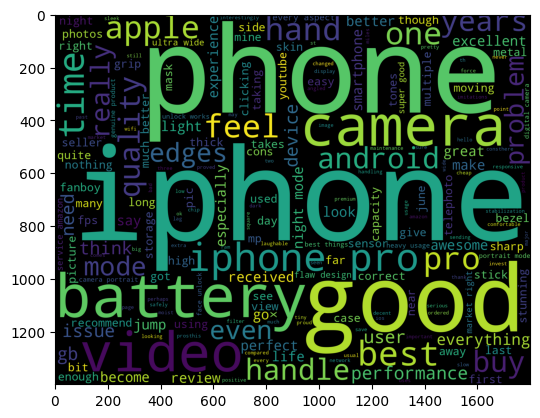

In [16]:

plt.imshow(wordcloud_ip)

In [19]:
from google.colab import files

uploaded = files.upload()

Saving negative-words.txt to negative-words.txt


In [23]:
# negative words  Choose path for -ve words stored in system
# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r",encoding='latin-1') as neg:
  negwords = neg.read().split("\n")


In [24]:
negwords =negwords[37:]

In [25]:
##Considering only the words which are present in the positive words

red_pos = " ".join([w for w in red_rev_words if w in negwords])

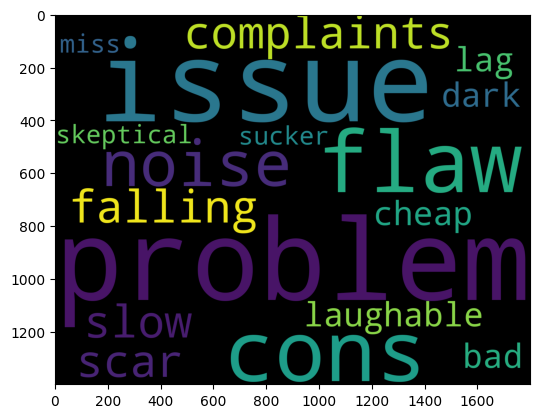

In [26]:
##Building Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_pos)

plt.imshow(wordcloud_pos)

In [27]:
##Unique words
red_unique = list(set(" ".join(iphone_reviews).split(" ")))

In [28]:

red_unique

['',
 'there',
 '.ConsThere',
 'pictures,',
 'anything.',
 'hands',
 'respect',
 'software',
 'things',
 'received',
 'even',
 'recommend',
 'impact',
 'makes',
 'tightening',
 'charging',
 'improve',
 'experience',
 'whole',
 'avoid',
 'spend',
 'again',
 'Prebooked',
 'night',
 'often.',
 '.ProsThis',
 'Especially',
 'life.',
 'right-angled',
 'handle',
 'longer',
 'sucker',
 'yes,',
 'however,',
 'means',
 'passcode',
 'everything',
 'border',
 'Amazon.Super',
 'man,electronic',
 'gripping',
 'light',
 'mobile.The',
 'gives',
 'now,',
 'important.',
 'measure',
 'Graphite',
 'sleek',
 'last',
 'could',
 'lag',
 '4S,',
 'out',
 'outside',
 'device,',
 '&',
 'Video',
 'ordered',
 '\nJust',
 'good!',
 'palm.',
 'youtube',
 'price',
 'hand-handling',
 'three',
 'But',
 'easy',
 'splendid,',
 'market',
 'tighten',
 'Photography,',
 'get',
 'equally',
 'serious',
 'without',
 'awesome!',
 'bezel',
 'becomes',
 'expected',
 'Phone',
 'taking',
 'Please',
 '6GB',
 'ok',
 'miss',
 'by',
 'te

In [29]:
from google.colab import files

uploaded = files.upload()

Saving Afinn.csv to Afinn.csv


In [30]:
#Sentiment analysis
import pandas as pd
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [33]:
afinn.head(5)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [36]:
from nltk import tokenize
import nltk
nltk.download('punkt')
red_unique = tokenize.sent_tokenize(" ".join(iphone_reviews))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [37]:
red_unique[5:15]

['!The filter mode is quite good.',
 'Many Android phones are still many miles away from these tones even though there are good imitations.',
 'Apple was able to improve its tones.Image quality is perfect and there is little or no noise even in a low-light environment .',
 '** Signal, nothing to say!',
 'It is much better in iPhone 12 Pro & Wifi also .ConsThere is a problem with the hand-handling of this phone.',
 'Oh yes, the iPhone 12 is light to handle, however, it is not easy to handle.',
 'The iPhone 12 comes with metal edges and there have been multiple complaints with respect to these edges.',
 'If you handle this phone for a long time, as your hand becomes a bit moist, the metal becomes slippery.',
 'To prevent your phone from falling to the ground, you will sub-consciously tighten your grip on the phone.',
 'Several reports have shown that tightening your grip on the iPhone 12 leaves you with a scar on your palm.']

In [38]:
sent_df = pd.DataFrame(red_unique, columns=['word'])
sent_df

,word
0,\nAs usual great & premium phone of 2020 .Pros...
1,It feels better than the sleek bezel of the iP...
2,The border is particularly stylish.The camera ...
3,"The night view mode turns on automatically, an..."
4,Video stabilization is also good!!!!!!!
...,...
154,Just made an upgrade from iPhone X to iPhone 1...
155,"The portrait mode, the night mode, the regular..."
156,This is truly a camera king smartphone availab...
157,If you are a photographer or loves taking pict...


In [39]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [40]:
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English

In [41]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        word = nlp(text)
        for word in red_unique:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [42]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [43]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [44]:
sent_df['sentiment_value'] = sent_df['word'].apply(calculate_sentiment)

In [45]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['word'].str.split().apply(len)
sent_df['word_count'].head(10)

0    32
1    18
2     8
3    14
4     5
5     6
6    17
7    23
8     5
9    21
Name: word_count, dtype: int64

In [46]:
sent_df.sort_values(by='sentiment_value').tail(10)


,word,sentiment_value,word_count
53,Minimum 5 years one iPhone will last with out ...,9,33
145,In Night Mode there is correct balance of ligh...,9,69
121,I ordered the phone on 20th June at night (11:...,10,27
42,I ordered the phone on 20th June at night (11:...,10,27
144,This iPhone 12pro Is the best in all the thing...,11,41
65,This iPhone 12pro Is the best in all the thing...,11,41
136,"But overall , its good phone and worth the pri...",13,49
57,"But overall , its good phone and worth the pri...",13,49
126,Stunning look.Awesome experience using dark mo...,14,14
47,Stunning look.Awesome experience using dark mo...,14,14


In [47]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    159.000000
mean       2.163522
std        3.229363
min       -3.000000
25%        0.000000
50%        2.000000
75%        3.000000
max       14.000000
Name: sentiment_value, dtype: float64

In [48]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,word,sentiment_value,word_count
1,It feels better than the sleek bezel of the iP...,0,18
8,"** Signal, nothing to say!",0,5
9,It is much better in iPhone 12 Pro & Wifi also...,-2,21
11,The iPhone 12 comes with metal edges and there...,0,18
12,"If you handle this phone for a long time, as y...",0,20


In [49]:

sent_df[sent_df['sentiment_value']>=10].head()

,word,sentiment_value,word_count
42,I ordered the phone on 20th June at night (11:...,10,27
47,Stunning look.Awesome experience using dark mo...,14,14
57,"But overall , its good phone and worth the pri...",13,49
65,This iPhone 12pro Is the best in all the thing...,11,41
121,I ordered the phone on 20th June at night (11:...,10,27


In [50]:
sent_df['index']=range(0,len(sent_df))

<ipython-input-51-6e3dcf195c51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

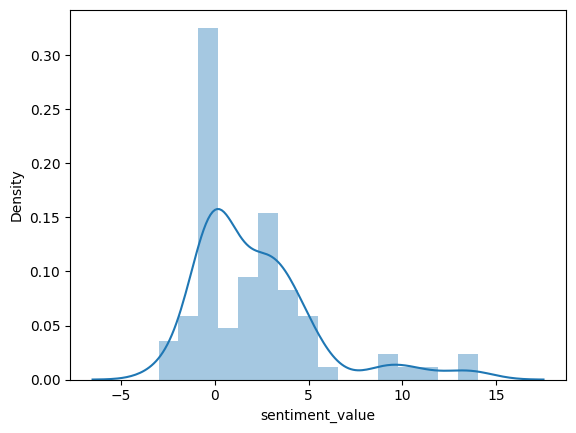

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

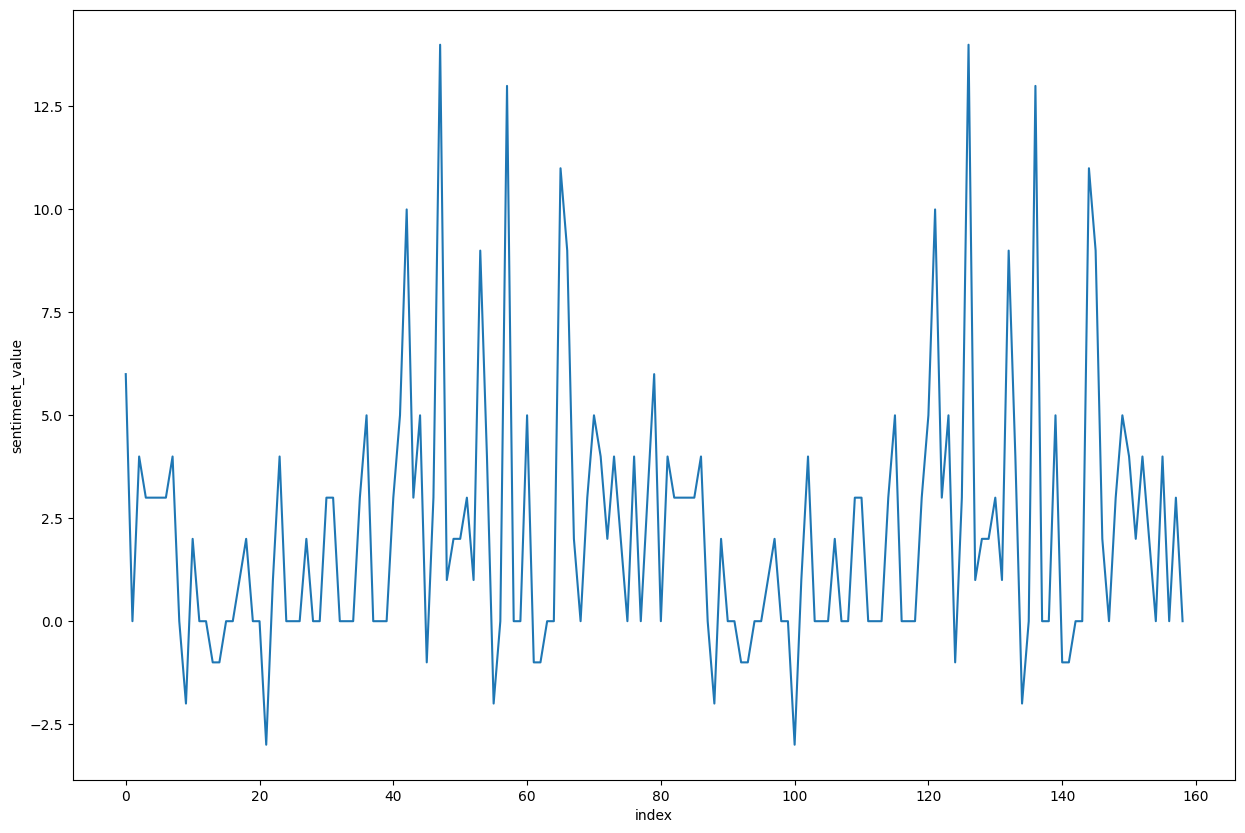

In [52]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

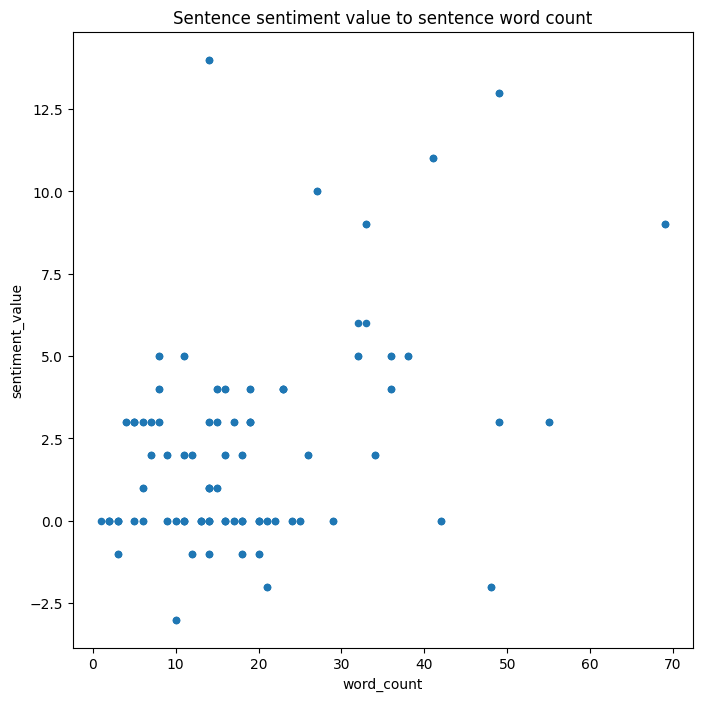

In [53]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')